In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Input, Concatenate, BatchNormalization

from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 

np.random.seed(123)
tf.random.set_seed(123)

### Human Activity Recognition 
-----------------------
We will work with the Human Activity datasets collected from the sensors of the smartphones. The original dataset can be reached from the [link](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Check out the kaggle [link](https://www.kaggle.com/erenaktas/human-activity-recognition) for more information about the data. 

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip


--2024-05-06 21:46:20--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: 'UCI-HAR.zip'

UCI-HAR.zip         100%[===================>]  58.17M  17.0MB/s    in 3.4s    

2024-05-06 21:46:24 (17.0 MB/s) - 'UCI-HAR.zip' saved [60999314/60999314]



In [3]:
# unzip the zip file 

!unzip -nq UCI-HAR.zip

### Explore the data
-------

In [36]:
!ls

ANN_Passengers.ipynb   UCI-HAR.zip            best_model.keras
ANN_Stocks.ipynb       __MACOSX               model.png
HumAct_ANN.ipynb       airline_passengers.csv sp500sub.csv
UCI HAR Dataset        best_model.h5


In [37]:
!ls 'UCI HAR Dataset'

README.txt          features.txt        test
activity_labels.txt features_info.txt   train


In [39]:
!ls 'UCI HAR Dataset/train'

Inertial Signals  X_train.txt       subject_train.txt y_train.txt


In [1]:
!head 'UCI HAR Dataset/train/X_train.txt' # samples where columns are pre-processed features 

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [33]:
!head 'UCI HAR Dataset/test/X_test.txt' # samples where columns are pre-processed features 

  2.5717778e-001 -2.3285230e-002 -1.4653762e-002 -9.3840400e-001 -9.2009078e-001 -6.6768331e-001 -9.5250112e-001 -9.2524867e-001 -6.7430222e-001 -8.9408755e-001 -5.5457721e-001 -4.6622295e-001  7.1720847e-001  6.3550240e-001  7.8949666e-001 -8.7776423e-001 -9.9776606e-001 -9.9841381e-001 -9.3434525e-001 -9.7566897e-001 -9.4982365e-001 -8.3047780e-001 -1.6808416e-001 -3.7899553e-001  2.4621698e-001  5.2120364e-001 -4.8779311e-001  4.8228047e-001 -4.5462113e-002  2.1195505e-001 -1.3489443e-001  1.3085848e-001 -1.4176313e-002 -1.0597085e-001  7.3544013e-002 -1.7151642e-001  4.0062978e-002  7.6988933e-002 -4.9054573e-001 -7.0900265e-001  9.3648925e-001 -2.8271916e-001  1.1528825e-001 -9.2542727e-001 -9.3701413e-001 -5.6428842e-001 -9.3001992e-001 -9.3782195e-001 -6.0558770e-001  9.0608259e-001 -2.7924413e-001  1.5289519e-001  9.4446140e-001 -2.6215956e-001 -7.6161676e-002 -1.7826920e-002  8.2929682e-001 -8.6462060e-001 -9.6779531e-001 -9.4972666e-001 -9.4611920e-001 -7.5971815e-001 -4.2497

In [3]:
!head 'UCI HAR Dataset/train/y_train.txt' # class labels from 1 to 6 

5
5
5
5
5
5
5
5
5
5


In [7]:
# labels are from 1,5
df = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header = None, delim_whitespace=True)

df[0].unique()

array([5, 4, 6, 1, 3, 2])

In [8]:
!ls 'UCI HAR Dataset/train/Inertial Signals' # looking at the inertial signals folder which includes the original data without preprocessing

body_acc_x_train.txt  body_gyro_x_train.txt total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt total_acc_z_train.txt


In [9]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt total_acc_z_test.txt


In [10]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt' # each row is a sample, so each column is a different point in time 

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [11]:
df = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', header = None, delim_whitespace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


Notice that there are 128 columns corresponding to the each time when a measurement is taken: 50 $\textrm{Hz} \to $ 50 measurements per second with a total of 2.56 second measurement, giving $50 \times 2.56 = 128$. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


In [13]:
df_test = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt', header = None, delim_whitespace=True)

df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,-0.002944,-0.001247,0.002848,0.002355,0.002721,0.003255,0.001301,0.001292,0.001470,0.002574
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,-0.002533,0.000163,-0.001095,-0.004547,-0.005310,-0.004094,0.002200,0.007788,0.003433,-0.001239
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,-0.004972,-0.003586,-0.003860,-0.003560,-0.000974,0.001052,0.000778,-0.000743,-0.001923,-0.004305
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,0.001249,0.000978,0.002248,0.003530,-0.000117,-0.003275,-0.001325,0.000597,-0.000246,-0.000269
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.003601,0.004918,0.003647,0.002481,0.004855,0.006754,0.004633,0.002157,-0.000869,-0.001329


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 2.9 MB


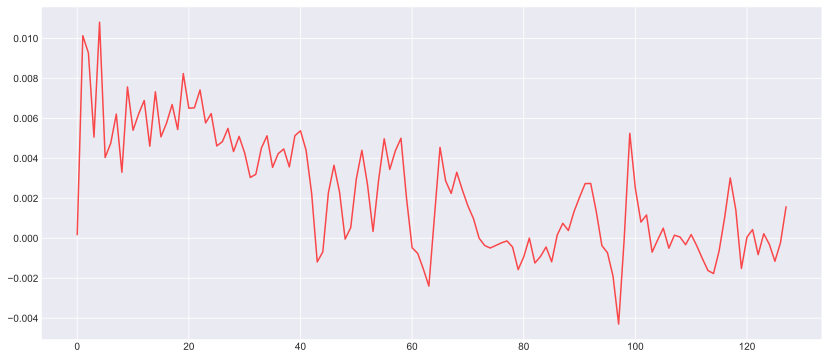

In [15]:
# Plot one of the training data

fig, axes = plt.subplots(figsize = (14,6))

df.iloc[0].plot(ax = axes, alpha = 0.7, color = 'red')

axes.grid()

#### Time Series approach with multiple NN's
--------

We will first employ the 'raw' time-series data with a suitable NN structure. Recall that we are aiming for a classification task among $K = 6$ different human activities. By inspection of the train and test set we have the following parameters:

In [47]:
T = 128 

N_train = 7352
N_test = 2947

D = 9 # 9 files
K = 6 # number of classes

In [48]:
# helper function to load the data 


def load_data():
    
    ''' Returns X_train (N_train x T x D), y_train (N_train)
        and 
        X_test (N_test x T x D), y_test (N_test)'''
    
    # initiate train and test X 
    Xtrain = np.zeros((N_train, T, D))
    Xtest = np.zeros((N_test, T, D))
    
    train_pfx = 'UCI HAR Dataset/train/'

    # train data
    ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
    ]
    
    # get X_train
    for d, fn in enumerate(ts_filenames):

        df = pd.read_csv(f'{train_pfx}Inertial Signals/{fn}', header = None, delim_whitespace=True)

        # turn each file into a N_train x T numpy array

        x = df.to_numpy()
        #print(d, ts_fns_tr[d])

        #assing it to X_train for the corresponding d in the loop
        Xtrain[:, :, d] = x


    # train labels - 1 to render them from 0,..,5

    Ytrain = pd.read_csv(f'{train_pfx}y_train.txt', header = None).to_numpy() - 1

    Ytrain = Ytrain.flatten()

    test_pfx = 'UCI HAR Dataset/test/'

    # test data
    ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
    ]

     # get X_test
    for d, fn in enumerate(ts_filenames):


        df = pd.read_csv(f'{test_pfx}Inertial Signals/{fn}', header = None, delim_whitespace=True)

        # turn each file into a N_train x T numpy array

        x = df.to_numpy()
        #print(d, ts_fns_test[d])
        #assing it to X_train for the corresponding d in the loop
        Xtest[:, :, d] = x

    # test labels - 1

    Ytest = pd.read_csv(f'{test_pfx}y_test.txt', header = None).to_numpy() - 1

    Ytest = Ytest.flatten()

    return Xtrain, Ytrain, Xtest, Ytest     

In [51]:
X_train, y_train, X_test, y_test = load_data()


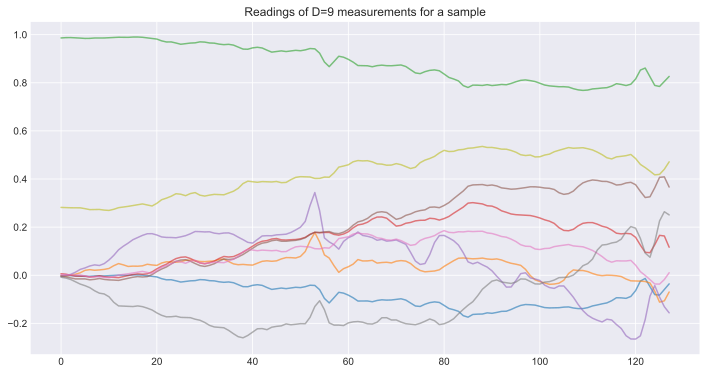

In [52]:
# plot one of the sample --> which will give D = 9 curves with T = 128 measurements 

fig, axes = plt.subplots(figsize = (12,6))

axes.plot(X_train[7000, :, :], alpha = 0.6)

axes.set_title('Readings of D=9 measurements for a sample')

axes.grid()



In [50]:
# ANN Model

inputs = []
features = []

# make a neural network for each of the D time series 

for d in range(D):

    i = Input(shape=(T,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    inputs.append(i)
    features.append(x)

# concatenate outputs of the each ANN
# output of the concatenate will be D x (size of each ANN's output)

x = Concatenate(axis = 1)(features)
x = Dense(K)(x)

model = Model(inputs = inputs, outputs = x)

In [30]:
# quite a complicated model! 

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_46      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_47      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_48      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_49      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_50      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_51      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_52      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_53      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_54      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_95 (Dense)    │ (None, 32)        │      4,128 │ input_layer_46[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_97 (Dense)    │ (None, 32)        │      4,128 │ input_layer_47[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_99 (Dense)    │ (None, 32)        │      4,128 │ input_layer_48[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_101 (Dense)   │ (None, 32)        │      4,128 │ input_layer_49[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_103 (Dense)   │ (None, 32)        │      4,128 │ input_layer_50[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_105 (Dense)   │ (None, 32)        │      4,128 │ input_layer_51[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_107 (Dense)   │ (None, 32)        │      4,128 │ input_layer_52[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_109 (Dense)   │ (None, 32)        │      4,128 │ input_layer_53[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_111 (Dense)   │ (None, 32)        │      4,128 │ input_layer_54[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_96 (Dense)    │ (None, 16)        │        528 │ dense_95[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_98 (Dense)    │ (None, 16)        │        528 │ dense_97[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 42,774 (167.09 KB)

 Trainable params: 42,774 (167.09 KB)

 Non-trainable params: 0 (0.00 B)

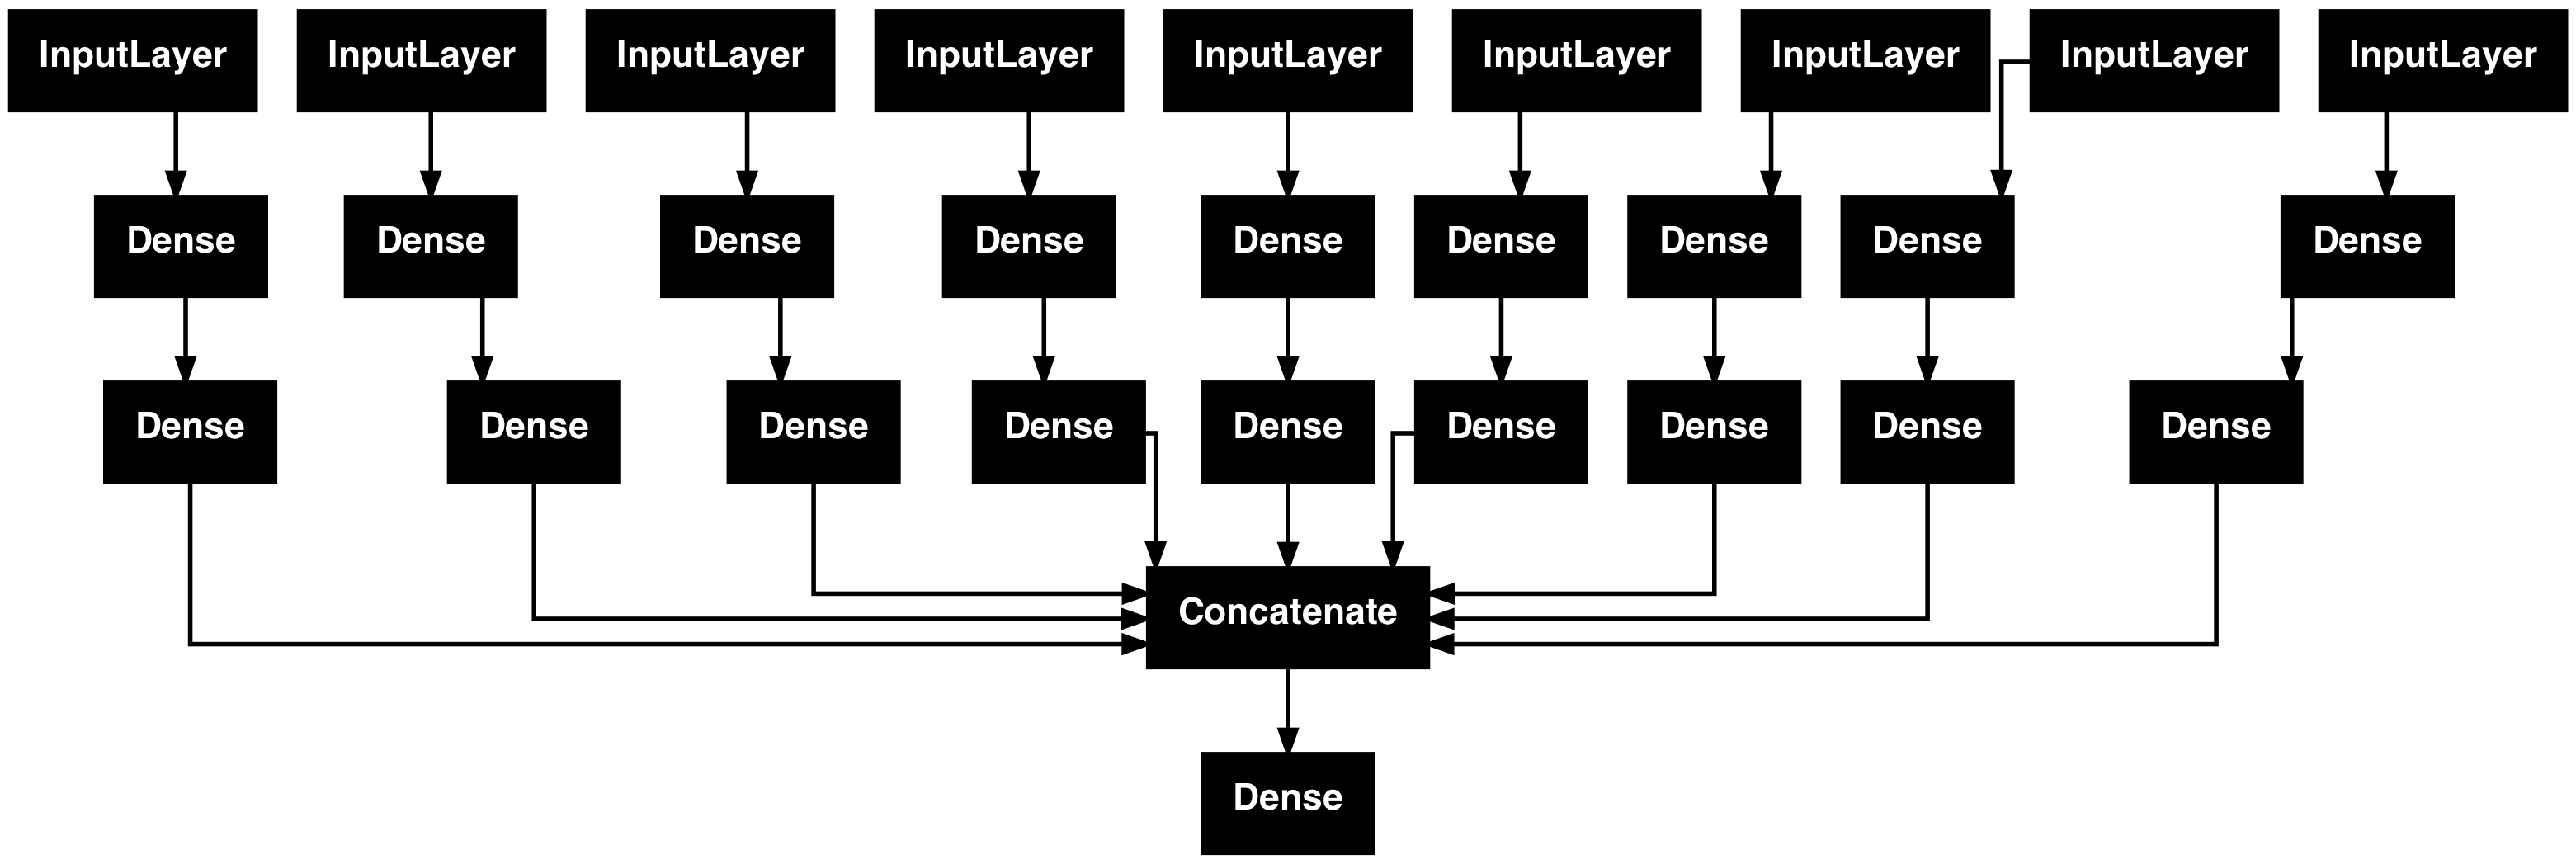

In [31]:
tf.keras.utils.plot_model(model)

In [32]:
# create a checkpoint to save the best model according to validation accuracy 

check_point = ModelCheckpoint('best_model.keras', monitor = 'val_accuracy', save_best_only=True)

In [33]:
# compile the model 

model.compile(loss= SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'],)

In [34]:
# For each D = 9 NN we will feed the train and test input 'features' seperately, so we will split them
X_train_split = [ ]
X_test_split = [ ]

for d in range(D):
    
    X_train_split.append(X_train[:, :, d])
    X_test_split.append(X_test[:, :, d])

In [35]:
# Fit the model 

result = model.fit(X_train_split, y_train, epochs = 15, callbacks=[check_point], validation_data = (X_test_split, y_test),)

Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5988 - loss: 1.0793 - val_accuracy: 0.8276 - val_loss: 0.4710
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.2547 - val_accuracy: 0.8595 - val_loss: 0.3610
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.1777 - val_accuracy: 0.8744 - val_loss: 0.3191
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9526 - loss: 0.1430 - val_accuracy: 0.8870 - val_loss: 0.2931
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9584 - loss: 0.1233 - val_accuracy: 0.8904 - val_loss: 0.2796
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1105 - val_accuracy: 0.8992 - val_loss: 0.2678
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9628 - loss: 0.1016 - val_accuracy: 0.9016 - val_loss: 0.2617
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.0942 - val_accuracy: 0.

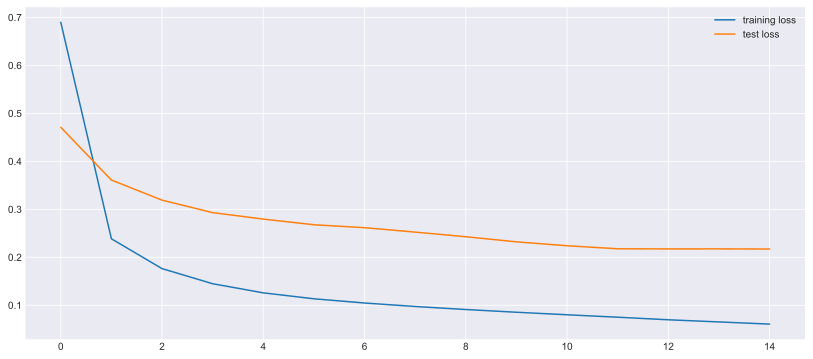

In [37]:
# plot training and test loss per epoch 

fig, axes = plt.subplots(figsize = (14,6))

axes.plot(result.history['loss'], label = 'training loss')
axes.plot(result.history['val_loss'], label = 'test loss')

axes.legend()

axes.grid()

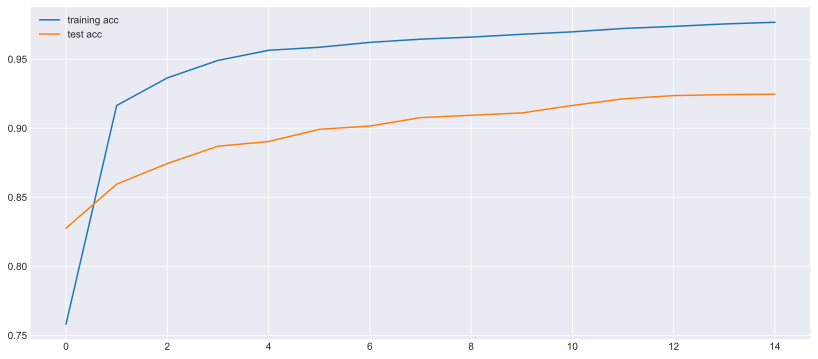

In [36]:
# plot training and test accuracy per epoch 

fig, axes = plt.subplots(figsize = (14,6))

axes.plot(result.history['accuracy'], label = 'training acc')
axes.plot(result.history['val_accuracy'], label = 'test acc')

axes.legend()

axes.grid()

In [53]:
# save the best model 

best_model = tf.keras.models.load_model('best_model.keras')

In [61]:
# make predictions, probs_test gives z_k according to softmax probabilities (also called odds) for each category k
# prob(k) = Exp[z_k]/Sum[Exp[z_k]]] 

probs_test = best_model.predict(X_test_split)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [62]:
# evaluate the mean accuracy of the best model which matches with the validation accuracy of the 15th epoch
# we pick the prediction to be the index of the max z_k, higher it is higher the conditional probability 

np.mean(np.argmax(probs_test, axis = 1) == y_test)

0.9246691550729556

### Good old static feature method
--------
Next we will employ the pre-processed static features derived from the time-series to build a NN model! We explored them earlier!

In [64]:
def load_features():

    '''Retruns X_train (N_train x D) and X_test (N_train x D)'''

    # train data 

    df = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header = None, delim_whitespace=True)

    feat_train = df.to_numpy()

    # test data 

    df = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header = None, delim_whitespace=True)

    feat_test = df.to_numpy()

    # scale 
    scaler = StandardScaler()
    feat_train = scaler.fit_transform(feat_train)
    feat_test = scaler.transform(feat_test)

    return feat_train, feat_test

In [65]:
# get training and test sets 

feat_train, feat_test = load_features()

In [66]:
# dimensionality of the features 

D_feat = feat_train.shape[1] 

In [67]:
#  Simple ANN

i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
feat_model = Model(i,x)

feat_model.compile(loss = SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])

In [68]:
# checkpoint 

check_point_feat = ModelCheckpoint('best_model_feat.keras', monitor = 'val_accuracy', save_best_only=True)

In [69]:
res_feat = feat_model.fit(feat_train, y_train, epochs = 15, callbacks = [check_point_feat], validation_data=(feat_test, y_test))

Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7567 - loss: 0.6197 - val_accuracy: 0.9311 - val_loss: 0.2023
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9635 - loss: 0.1096 - val_accuracy: 0.9308 - val_loss: 0.1778
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0740 - val_accuracy: 0.9332 - val_loss: 0.1740
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0600 - val_accuracy: 0.9338 - val_loss: 0.1832
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9817 - loss: 0.0516 - val_accuracy: 0.9308 - val_loss: 0.1952
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0450 - val_accuracy: 0.9298 - val_loss: 0.2071
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0400 - val_accuracy: 0.9294 - val_loss: 0.2151
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.0364 - val_accuracy: 0.

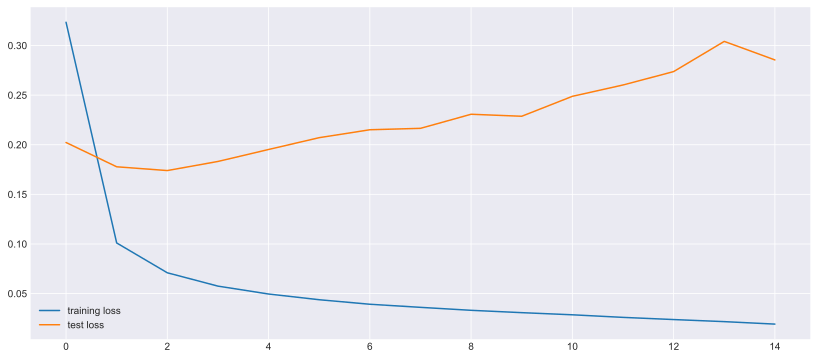

In [70]:
# plot training and test loss per epoch 

fig, axes = plt.subplots(figsize = (14,6))

axes.plot(res_feat.history['loss'], label = 'training loss')
axes.plot(res_feat.history['val_loss'], label = 'test loss')

axes.legend()

axes.grid()

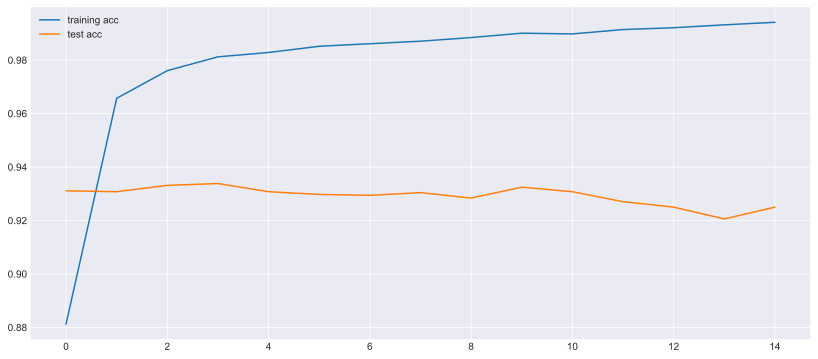

In [71]:
# plot training and test accuracy per epoch 

fig, axes = plt.subplots(figsize = (14,6))

axes.plot(res_feat.history['accuracy'], label = 'training acc')
axes.plot(res_feat.history['val_accuracy'], label = 'test acc')

axes.legend()

axes.grid()

In [72]:
# load best model, make predictions and compute the accuracy 

best_model_feat = tf.keras.models.load_model('best_model_feat.keras')

probs_test_feat = best_model_feat.predict(feat_test)

np.mean(np.argmax(probs_test_feat, axis = 1) == y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9338310145911096

This model performs slightly better than the previous time-series approach

### Hybrid approach
-------
Next we will combine two models using both the time-series itself and the static features. 

In [73]:
# Combined ANN Model

inputs = []
features = []

# make a neural network for each of the D time series 

for d in range(D):

    i = Input(shape=(T,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    inputs.append(i)
    features.append(x)

i2 = Input(shape = (D_feat,))
x2 = Dense(32, activation = 'relu')(i2)

# concatenate outputs of the each ANN
# output of the concatenate will be D x (size of each ANN's output)

x = Concatenate(axis = 1)(features + [x2])
x = Dense(K)(x)

hmodel = Model(inputs = inputs + [i2], outputs = x)

In [75]:
hmodel.compile(loss = SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])

# checkpoint 

check_point_h = ModelCheckpoint('best_model_h.keras', monitor = 'val_accuracy', save_best_only=True)

In [76]:
# fit 

res_h = hmodel.fit(X_train_split + [feat_train] , y_train, epochs = 15, callbacks = [check_point_h], validation_data=(X_test_split + [feat_test], y_test))

Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7762 - loss: 0.5904 - val_accuracy: 0.9284 - val_loss: 0.2509
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9719 - loss: 0.0888 - val_accuracy: 0.9338 - val_loss: 0.2017
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9777 - loss: 0.0612 - val_accuracy: 0.9379 - val_loss: 0.1842
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0504 - val_accuracy: 0.9403 - val_loss: 0.1829
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9827 - loss: 0.0448 - val_accuracy: 0.9393 - val_loss: 0.1907
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9840 - loss: 0.0397 - val_accuracy: 0.9382 - val_loss: 0.1986
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0349 - val_accuracy: 0.9352 - val_loss: 0.2120
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0304 - val_accuracy: 0.

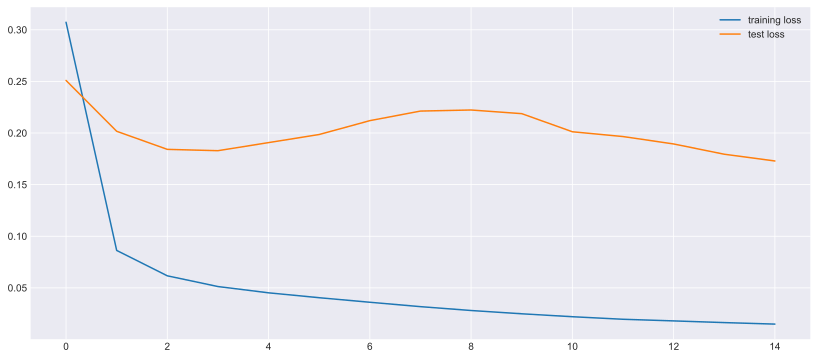

In [77]:
# plot training and test loss per epoch 

fig, axes = plt.subplots(figsize = (14,6))

axes.plot(res_h.history['loss'], label = 'training loss')
axes.plot(res_h.history['val_loss'], label = 'test loss')

axes.legend()

axes.grid()

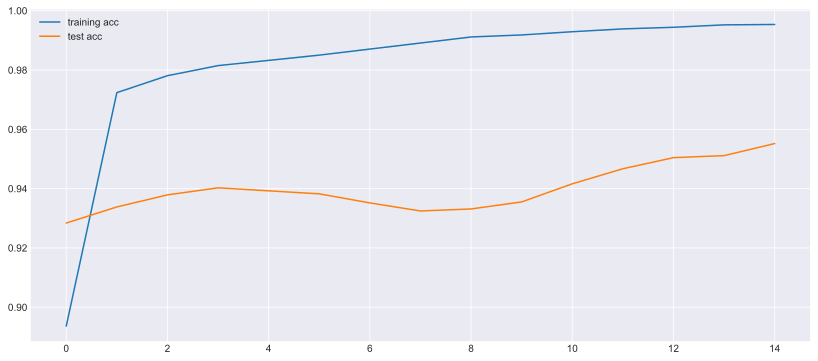

In [78]:
# plot training and test accuracy per epoch 

fig, axes = plt.subplots(figsize = (14,6))

axes.plot(res_h.history['accuracy'], label = 'training acc')
axes.plot(res_h.history['val_accuracy'], label = 'test acc')

axes.legend()

axes.grid()

In [80]:
# load best model, make predictions and compute the accuracy 

best_model_h = tf.keras.models.load_model('best_model_h.keras')

probs_test_h = best_model_h.predict(X_test_split + [feat_test])

np.mean(np.argmax(probs_test_h, axis = 1) == y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9552086868001357

As we can infer from the overall accuracy, the hybrid approach led to better results as compared to the individual time series and static approach! But let's have a look at other standard ML approaches from sklearn and compare

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [82]:
lr = LogisticRegression(solver = 'liblinear')

lr.fit(feat_train, y_train)

print(f"Train and test accuracy: {lr.score(feat_train, y_train)} vs {lr.score(feat_test, y_test)}")

Train and test accuracy: 0.9945593035908596 vs 0.9613165931455717


Even better than our hybrid NN approach! Decision boundary could be very close to linear! 

In [83]:
svc = SVC()

svc.fit(feat_train, y_train)

print(f"Train and test accuracy: {svc.score(feat_train, y_train)} vs {svc.score(feat_test, y_test)}")

Train and test accuracy: 0.9866702937976061 vs 0.9521547336274178


In [84]:
svc = SVC(kernel = 'linear')

svc.fit(feat_train, y_train)

print(f"Train and test accuracy: {svc.score(feat_train, y_train)} vs {svc.score(feat_test, y_test)}")

Train and test accuracy: 0.9968715995647442 vs 0.9609772650152698


These results indicate the power of feature engineering! It could be more useful to work with static carefully engineered features than building NN's that can work with time-series data! 